## Importar Librerias

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Circle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2025-09-30 20:57:15.439552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 20:57:15.442422: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 20:57:15.450473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759283835.464183  126306 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759283835.468155  126306 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-30 20:57:15.482705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Generar un dataset

Objetivo
Pasar de Celsius a Fahrenheit

F = C*1.8 + 32

In [2]:
X = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
y = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)


## Visualización de los datos

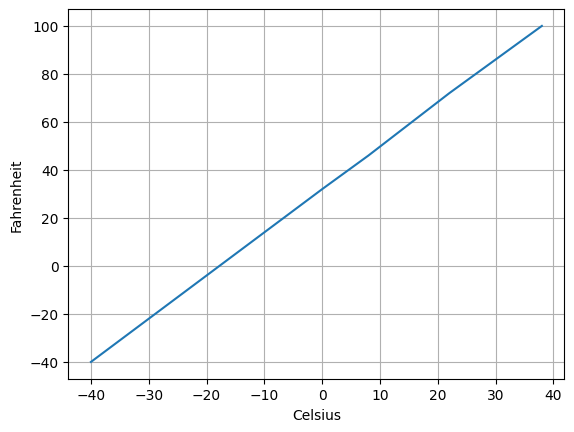

In [3]:
# Generar grafica de dispersión 
plt.plot(X, y)
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.grid(True)
plt.show()

## construir modelo

In [4]:

model = Sequential([
    Dense(units=3, input_shape=[1]),
    Dense(units=1)
])

/home/jclondonol/Documents/EAFIT/Courses/Applied-ML-Course/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1759283836.734446  126306 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## compilar el modelo

In [5]:
model.compile(
    Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

## entrenar el modelo

In [6]:
history = model.fit(X, y, epochs=150)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 3075.6125
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2176.8188
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1499.4344
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1069.2643
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 896.8525
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 950.7366
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1112.3225
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1224.5099
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1224.3107
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1136.3842
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1011.0164
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 890.9357
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 801.1862
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 749.4755
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/s

## perdida

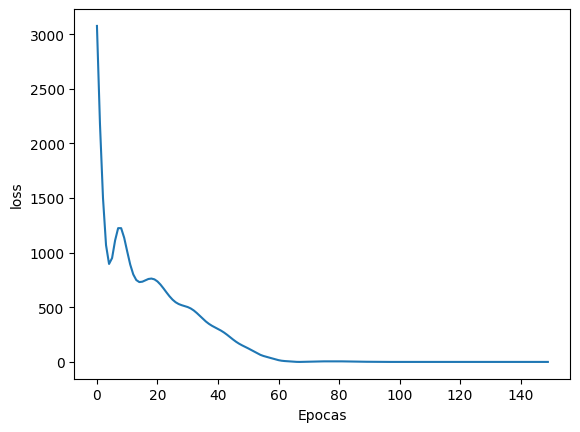

In [7]:
plt.xlabel('Epocas')
plt.ylabel('loss')
plt.plot(history.history['loss'])

## predicción

In [8]:
pred = model.predict(np.array([100.0], dtype=float))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[211.72122]]


## Variables del modelo

In [9]:
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Capa {i+1}")
    print("Pesos:", weights)
    print("Biases:", biases)
    print("-"*30)

Capa 1
Pesos: [[-1.3058474   0.20421845  0.09198394]]
Biases: [-5.683441  -5.0260315 -6.114809 ]
------------------------------
Capa 2
Pesos: [[-1.7162576]
 [-1.4787632]
 [-1.5415162]]
Biases: [5.3700743]
------------------------------
